<a href="https://colab.research.google.com/github/manjuiitm/mlprojects/blob/main/soilmoisture_prediciton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose

# Importing Data


In [2]:
df = pd.read_excel('DoneSoilMaxMinRainWindMaxMinRainWind (1).xlsx')

In [3]:
df.head()

,District,Date,Soil Moisture,MN,DT,MAX TEMP,MIN TEMP,WIND,RAIN,Unnamed: 9,...,SL,HA,TH,DS,FG,GA,Unnamed: 19,Year,Month,Day
0,Alappuzha,2019-01-01,15.317384,1,1,33.7,21.8,1.0,0.0,,...,0,0,0,0,0,0,NaN,2019,1,1
1,Alappuzha,2019-01-02,14.969961,1,2,33.1,21.0,1.0,0.0,,...,0,0,0,0,0,0,NaN,2019,1,2
2,Alappuzha,2019-01-03,14.607432,1,3,33.5,19.1,1.0,0.0,,...,0,0,0,0,0,0,NaN,2019,1,3
3,Alappuzha,2019-01-04,14.248763,1,4,33.2,20.3,1.0,0.0,,...,0,0,0,0,0,0,NaN,2019,1,4
4,Alappuzha,2019-01-05,13.909565,1,5,34.0,20.6,1.0,0.0,,...,0,0,0,0,0,0,NaN,2019,1,5


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19470 entries, 0 to 19469
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   District       19470 non-null  object        
 1   Date           19470 non-null  datetime64[ns]
 2   Soil Moisture  19470 non-null  float64       
 3   MN             19470 non-null  int64         
 4   DT             19470 non-null  int64         
 5   MAX TEMP       19470 non-null  float64       
 6   MIN TEMP       19470 non-null  float64       
 7   WIND           19470 non-null  float64       
 8   RAIN           19470 non-null  float64       
 9   Unnamed: 9     2676 non-null   object        
 10  RA             18703 non-null  object        
 11  DZ             18703 non-null  object        
 12  SN             18703 non-null  object        
 13  SL             18703 non-null  object        
 14  HA             18703 non-null  object        
 15  TH             1870

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

district_name = "Ernakulam"  # Change to the desired district
district_data = df[df['District'] == district_name]

In [8]:
district_data = district_data.sort_values(by='Date')

In [9]:
print(district_data.head())

       District       Date  Soil Moisture  MN  DT  MAX TEMP  MIN TEMP  WIND  \
1947  Ernakulam 2019-01-01      20.249780   1   1      33.3      20.4   6.0   
1948  Ernakulam 2019-01-02      19.831255   1   2      32.5      19.4   6.0   
1949  Ernakulam 2019-01-03      19.433846   1   3      32.1      17.3   5.0   
1950  Ernakulam 2019-01-04      19.054425   1   4      34.1      17.2   5.0   
1951  Ernakulam 2019-01-05      18.716502   1   5      33.4      16.5   5.0   

      RAIN Unnamed: 9  ... SL HA TH DS FG GA Unnamed: 19  Year Month  Day  
1947   0.0        NaN  ...  0  0  0  0  0  0         NaN  2019     1    1  
1948   0.0        NaN  ...  0  0  0  0  0  0         NaN  2019     1    2  
1949   0.0        NaN  ...  0  0  0  0  0  0         NaN  2019     1    3  
1950   0.0        NaN  ...  0  0  0  0  0  0         NaN  2019     1    4  
1951   0.0        NaN  ...  0  0  0  0  0  0         NaN  2019     1    5  

[5 rows x 23 columns]


In [13]:
district_data = district_data.sort_values(by='Date').reset_index(drop=True)

In [14]:
feature_cols = ['MAX TEMP', 'MIN TEMP', 'RAIN', 'WIND']
target_col = 'Soil Moisture'

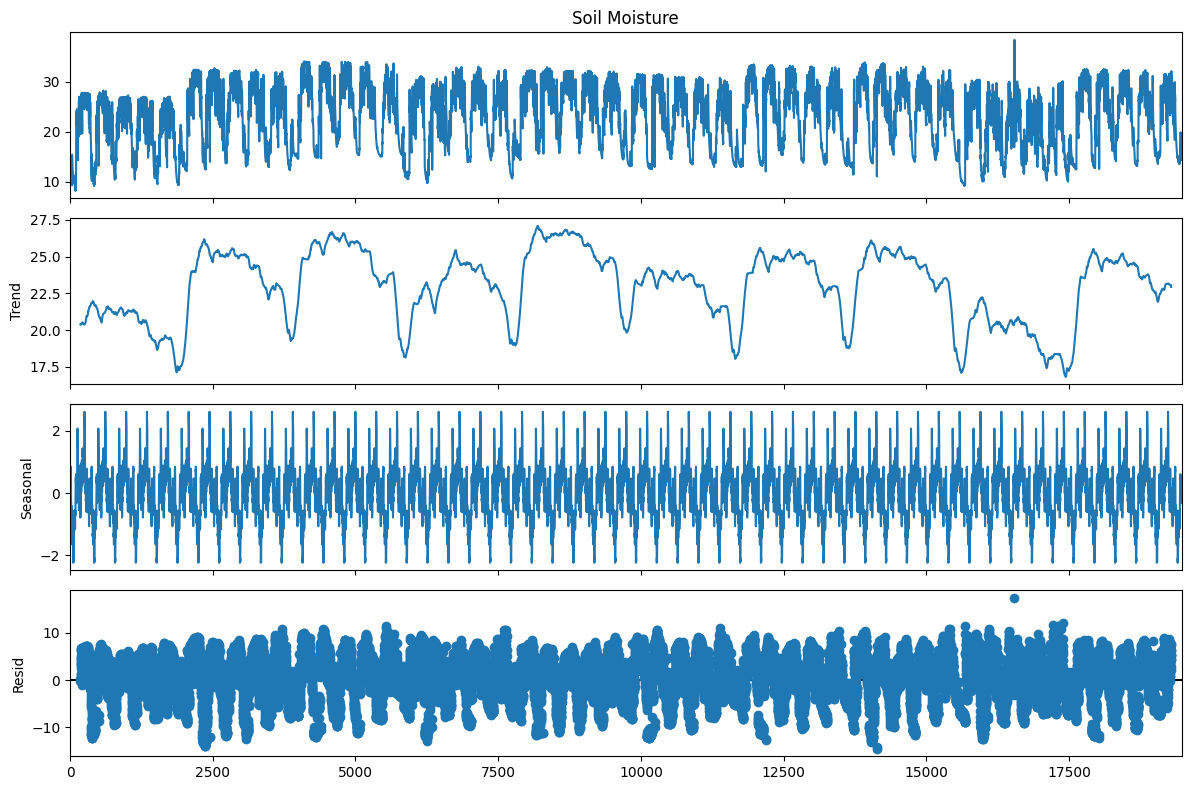

In [17]:
result = seasonal_decompose(df[target_col], model='additive', period=365)  # Adjust 'period' as needed
# Set the figure size using rcParams
plt.rcParams['figure.figsize'] = (12, 8)
# Plot the decomposed components
result.plot()
plt.show()

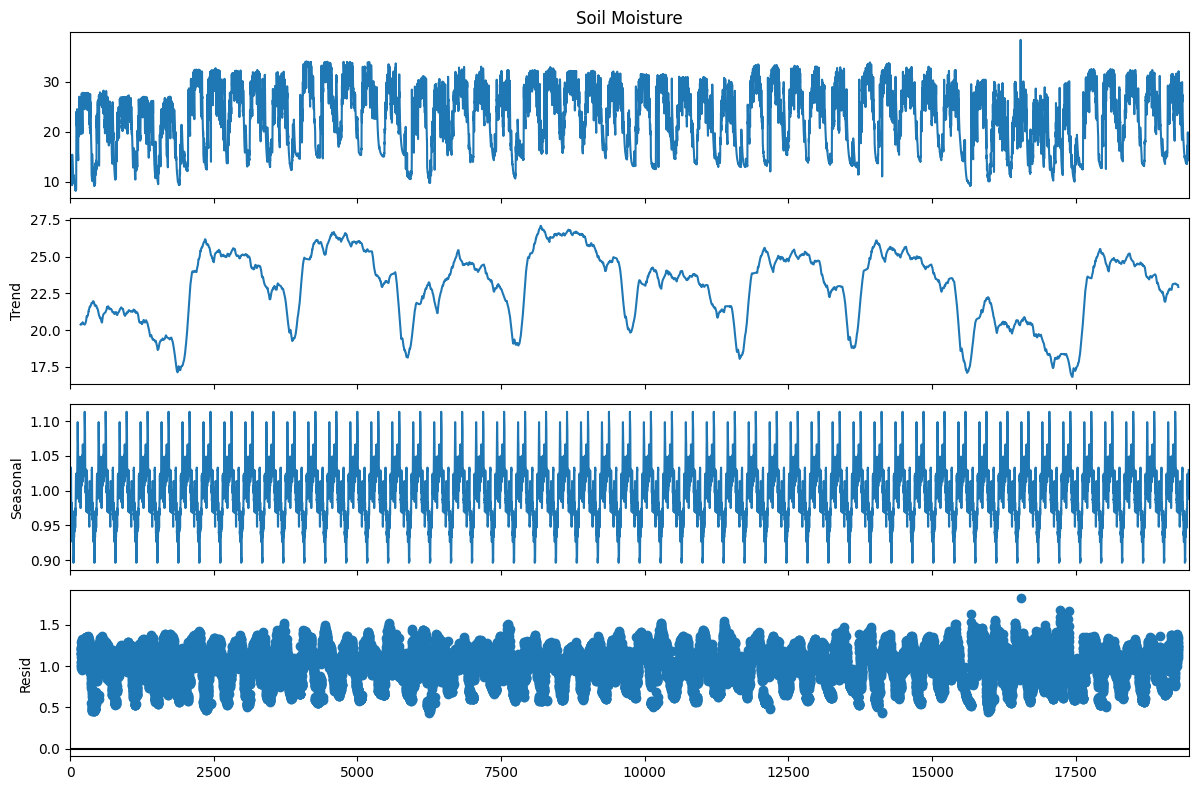

In [18]:
result_mul = seasonal_decompose(df[target_col], model='multiplicative', period=365)  # Adjust 'period' as needed
# Set the figure size using rcParams
plt.rcParams['figure.figsize'] = (12, 8)
# Plot the decomposed components
result_mul.plot()
plt.show()

In [19]:
trend_Add = result.trend
seasonality_Add = result.seasonal
residual_Add = result.resid

print('Trend_Add','\n',trend_Add.head(12),'\n')
print('Seasonality_Add','\n',seasonality_Add.head(12),'\n')
print('Residual_Add','\n',residual_Add.head(12),'\n')

Trend_Add 
 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
Name: trend, dtype: float64 

Seasonality_Add 
 0    -0.422370
1    -0.333440
2    -0.001703
3     0.085886
4     0.069279
5     0.014838
6    -0.267166
7    -0.055244
8     0.313633
9     0.577117
10    0.637224
11    0.719335
Name: seasonal, dtype: float64 

Residual_Add 
 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
Name: resid, dtype: float64 



In [26]:
train = district_data [district_data ['Year'] < 2023]
test = district_data [district_data ['Year'] > 2023]

In [27]:
print('Training Data')
train.shape

Training Data


(1461, 23)

In [28]:
print('Test Data')
test.shape

Test Data


(121, 23)

In [29]:
import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams

In [31]:
model_SES = SimpleExpSmoothing(train['Soil Moisture'],initialization_method='estimated')

In [32]:
model_SES_autofit = model_SES.fit(optimized=True)

In [33]:
SES_predict = model_SES_autofit.forecast(steps = len(test))

In [34]:
SES_predict

,0
1461,18.755257
1462,18.755257
1463,18.755257
1464,18.755257
1465,18.755257
...,...
1577,18.755257
1578,18.755257
1579,18.755257
1580,18.755257


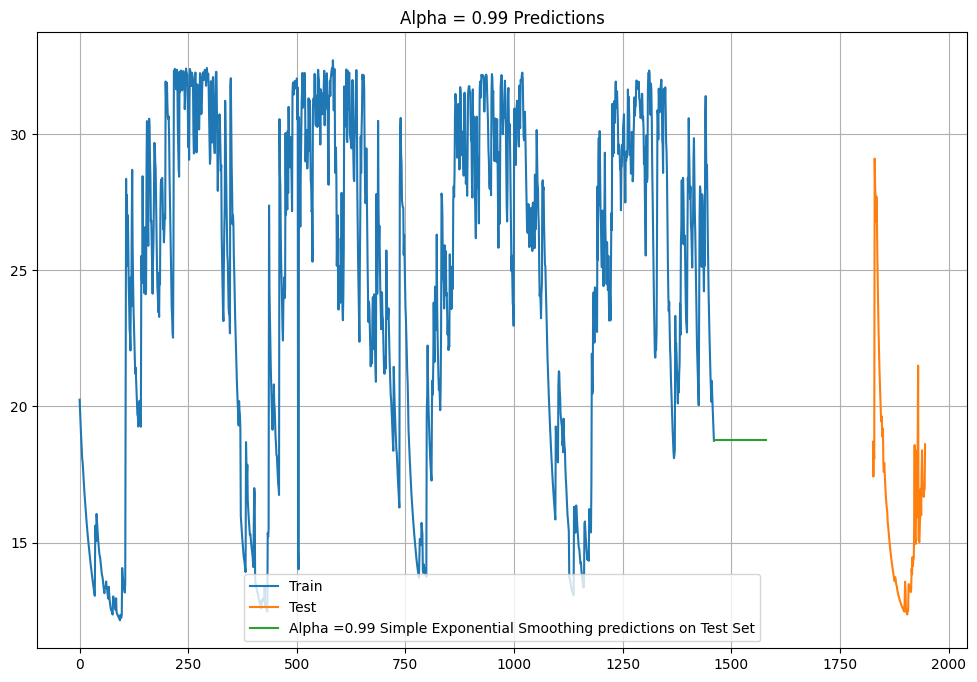

In [36]:
plt.plot(train['Soil Moisture'], label='Train')
plt.plot(test['Soil Moisture'], label='Test')

plt.plot(SES_predict, label='Alpha =0.99 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.99 Predictions');

In [37]:
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [46]:
from sklearn.metrics import mean_squared_error
SES_predict = model_SES_autofit.forecast(steps=len(test['Soil Moisture']))


In [53]:
mse = mean_squared_error(test['Soil Moisture'].values, SES_predict.values)

# Compute RMSE by taking the square root of MSE
rmse = np.sqrt(mse)

# Print the RMSE
print('SES RMSE:', rmse)

SES RMSE: 4.575034067851025


In [59]:
# Create the results DataFrame
resultsDf = pd.DataFrame({'Test RMSE': [round(rmse, 2)]}, index=['SES - Alpha=0.99'])

# Display the results
resultsDf

,Test RMSE
SES - Alpha=0.99,4.58


## Holt's Model - Double Exponential Smoothning

In [61]:
# Correct the extra quotation mark
model_DES = Holt(train['Soil Moisture'], initialization_method='estimated')


In [62]:
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.9649861313166149, 'smoothing_trend': 1.4859905757063483e-17, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 20.235794850047053, 'initial_trend': -0.0010165876479200603, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [63]:
DES_predict =  model_DES.forecast(len(test))
DES_predict

,0
1461,18.754204
1462,18.753187
1463,18.752171
1464,18.751154
1465,18.750137
...,...
1577,18.636280
1578,18.635263
1579,18.634246
1580,18.633230


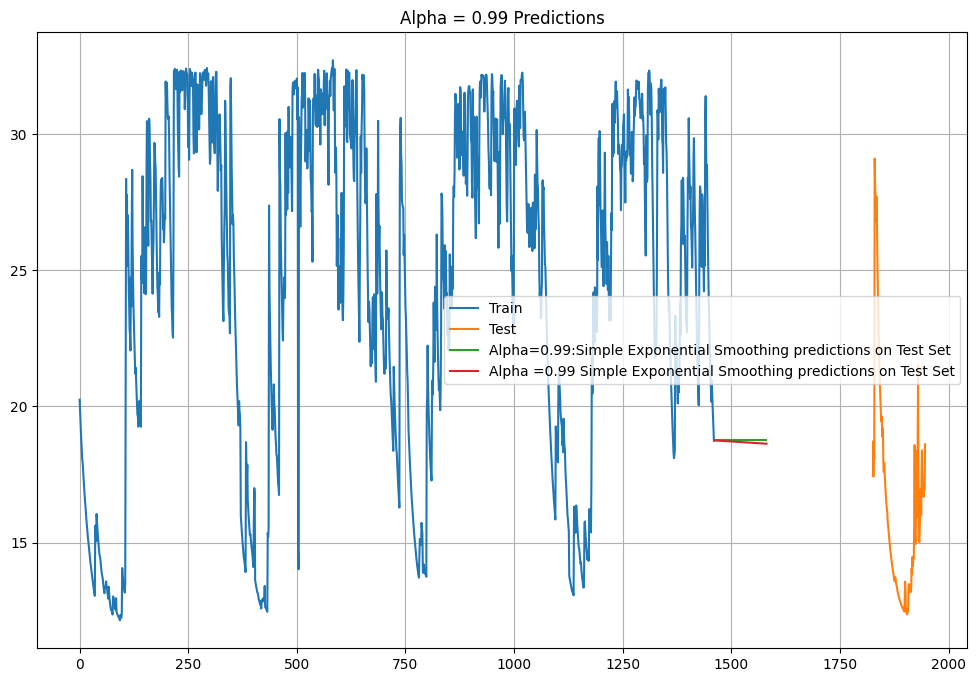

In [65]:
plt.plot(train['Soil Moisture'], label='Train')
plt.plot(test['Soil Moisture'], label='Test')

plt.plot(SES_predict, label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha =0.99 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.99 Predictions');

In [69]:
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(test['Soil Moisture'].values, DES_predict.values)

# Calculate RMSE by taking the square root of MSE
rmse = np.sqrt(mse)

# Print RMSE
print('DES RMSE:', rmse)

DES RMSE: 4.527514305442752


In [71]:
# Create a temporary DataFrame to store RMSE
resultsDf_temp = pd.DataFrame({'Test RMSE': [round(rmse, 2)]},
                              index=['Alpha=1,Beta=0.0189:DES'])

# Concatenate the temporary DataFrame to the results DataFrame
resultsDf = pd.concat([resultsDf, resultsDf_temp])

# Display the results DataFrame
print(resultsDf)

                         Test RMSE
SES - Alpha=0.99              4.58
Alpha=1,Beta=0.0189:DES       4.53


In [ ]:
## Holt's Winter Model

In [ ]:
## Trend  = Additive and Seasonality = Additive

In [75]:
# Convert the 'Date' column to datetime if not already done
train['Date'] = pd.to_datetime(train['Date'])

# Set the 'Date' column as the index
train.set_index('Date', inplace=True)

model_TES = ExponentialSmoothing(train['Soil Moisture'], trend='additive', seasonal='additive', initialization_method='estimated')
model_fitted = model_TES.fit()

# Forecast the next steps (example)
forecast = model_fitted.forecast(steps=10)
print(forecast)

<ipython-input-75-34f14de64bf6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Date'] = pd.to_datetime(train['Date'])
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2023-01-01    18.854028
2023-01-02    18.835565
2023-01-03    18.777612
2023-01-04    18.778967
2023-01-05    18.913992
2023-01-06    18.835277
2023-01-07    18.744679
2023-01-08    18.847058
2023-01-09    18.828595
2023-01-10    18.770642
Freq: D, dtype: float64


In [76]:
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.9660357566492764, 'smoothing_trend': 5.450922761838845e-12, 'smoothing_seasonal': 9.5894383417905e-12, 'damping_trend': nan, 'initial_level': 20.15638105295666, 'initial_trend': -0.0009957218665976222, 'initial_seasons': array([0.07953023, 0.08188085, 0.217901  , 0.14018221, 0.05058024,
       0.15395468, 0.13648765]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [77]:
TES_predict =  model_TES.forecast(len(test))
TES_predict

,0
2023-01-01,18.854028
2023-01-02,18.835565
2023-01-03,18.777612
2023-01-04,18.778967
2023-01-05,18.913992
...,...
2023-04-27,18.802471
2023-04-28,18.723756
2023-04-29,18.633159
2023-04-30,18.735537


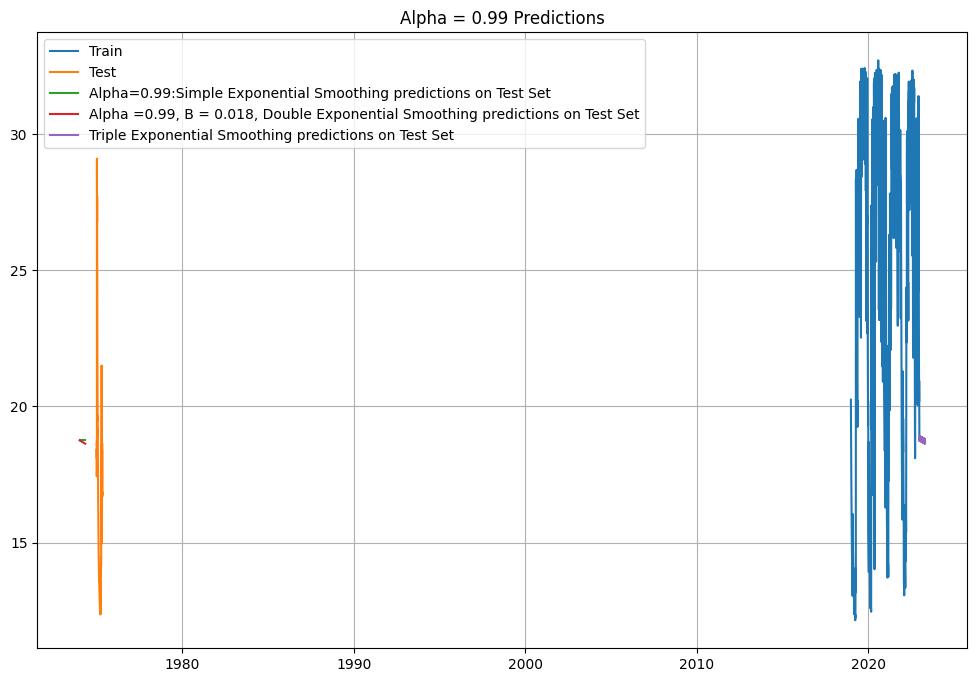

In [78]:
plt.plot(train['Soil Moisture'], label='Train')
plt.plot(test['Soil Moisture'], label='Test')

plt.plot(SES_predict, label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha =0.99, B = 0.018, Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.99 Predictions');

In [79]:
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(test['Soil Moisture'].values, TES_predict.values)

# Calculate RMSE by taking the square root of MSE
rmse = np.sqrt(mse)

# Print RMSE
print('TES RMSE:', rmse)

TES RMSE: 4.564466746777586


In [80]:
# Create a temporary DataFrame to store RMSE
resultsDf_temp = pd.DataFrame({'Test RMSE': [round(rmse, 2)]},
                              index=['Alpha=1,Beta=0.0189:DES'])

# Concatenate the temporary DataFrame to the results DataFrame
resultsDf = pd.concat([resultsDf, resultsDf_temp])

# Display the results DataFrame
print(resultsDf)

                         Test RMSE
SES - Alpha=0.99              4.58
Alpha=1,Beta=0.0189:DES       4.53
Alpha=1,Beta=0.0189:DES       4.56


In [82]:
decomposition = seasonal_decompose(df,model='additive')
decomposition.plot();
decomposition_m = seasonal_decompose(df,model='multiplicative')
decomposition_m.plot();

ValueError: could not convert string to float: 'Alappuzha'